# Titanic Survival Prediction

## 1. Introduction & Problem Definition
### 1.1. Context
The sinking of the RMS Titanic is one of the most infamous maritime disasters in history. On April 15, 1912, the supposedly "unsinkable" ship struck an iceberg and sank, resulting in the deaths of over 1,500 of the 2,224 passengers and crew. It was clear from the tragedy that survival was not a matter of pure chance; factors such as age, gender, and socio-economic class appeared to heavily influence the outcomes.
### 1.2 Project Objective
The goal of this project is to construct a predictive machine learning model that can accurately determine whether a passenger would have survived the Titanic disaster, based on a set of personal and travel-related features.
### 1.3. Problem Type
This is a Supervised Learning problem, specifically a Binary Classification, where the target variable is discrete: Survived (1 = Yes, 0 = No).

### 1.4. Success Metrics
Primary Metric: Accuracy. This is the percentage of total correct predictions (both Survived and Died) out of all passengers. It is the standard metric for this Kaggle competition.

Secondary Metrics: Confusion Matrix, Precision, Recall, and F1-Score. We will also analyze these metrics to gain a deeper understanding of the model's performance, especially its ability to correctly identify each class (e.g., does it confuse "Survived" with "Died"?).

## 2. Data Preprocessing & Feature Engineering
This is the most critical phase. The raw data is messy and cannot be fed directly into a model.

### 2.1. Handling Missing Data
*(Run `df_raw.isnull().sum()` here to show the missing values)*

* **Age:** Contains 177 missing values. We will impute these using the **median** age of all passengers.
* **Embarked:** Contains 2 missing values. We will impute these with the **mode** (most common) port.
* **Cabin:** Has over 77% missing data. Imputation is not feasible. This feature will be **dropped**.

### 2.2. Feature Engineering
Create new, more meaningful features from the existing ones.
* **FamilySize:** Engineer a new feature by combining `SibSp` and `Parch` + 1 (for the passenger themselves).
* **Title:** The `Name` column contains valuable titles (Mr., Mrs., Miss., Master.). We will extract these to create a new `Title` feature.

### 2.3. Data Transformation
Convert all features into a numeric format for the model.
* **Encoding:** Apply One-Hot Encoding to categorical features (`Sex`, `Embarked`, `Title`).
* **Scaling:** Apply `MinMaxScaler` to continuous numerical features (`Age`, `Fare`) to bring them to the same [0, 1] scale.

### 2.4. Final Feature Selection
Drop the original, now unnecessary columns (`Name`, `Ticket`, `Cabin`, `SibSp`, `Parch`). The final processed DataFrame is now ready for the Model Training phase.

In [4]:
import pandas as pd 
import numpy as np

In [5]:
test_data = pd.read_csv('test_data.csv')
train_data = pd.read_csv('train_data.csv')

In [6]:
# Preview of data
train_data.head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [7]:
test_data.head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,791,792,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,792,793,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,793,794,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,794,795,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,795,796,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   792 non-null    int64  
 1   PassengerId  792 non-null    int64  
 2   Survived     792 non-null    int64  
 3   Sex          792 non-null    int64  
 4   Age          792 non-null    float64
 5   Fare         792 non-null    float64
 6   Pclass_1     792 non-null    int64  
 7   Pclass_2     792 non-null    int64  
 8   Pclass_3     792 non-null    int64  
 9   Family_size  792 non-null    float64
 10  Title_1      792 non-null    int64  
 11  Title_2      792 non-null    int64  
 12  Title_3      792 non-null    int64  
 13  Title_4      792 non-null    int64  
 14  Emb_1        792 non-null    int64  
 15  Emb_2        792 non-null    int64  
 16  Emb_3        792 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 105.3 KB


### 2.2. Initial Data Inspection

**Analysis:**
* The training set contains 792 samples and 17 columns.
* **Critical Observation:** The data has **zero missing values** (all `Non-Null Counts` are 792).
* Numerical features like `Age` (0.2750) and `Fare` (0.014151) have already been **Scaled**, likely to a [0, 1] range.
* Categorical features like `Pclass`, `Title`, and `Emb` (Embarked) have already been **One-Hot Encoded** (e.g., `Pclass_1`, `Title_1`, `Emb_1`).

**Conclusion:**
The loaded dataset (`train_data.csv`) is a **pre-processed and cleaned** file. Therefore, this notebook will focus on **Phase 2: Model Training, Evaluation, and Deployment.**

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   100 non-null    int64  
 1   PassengerId  100 non-null    int64  
 2   Survived     100 non-null    int64  
 3   Sex          100 non-null    int64  
 4   Age          100 non-null    float64
 5   Fare         100 non-null    float64
 6   Pclass_1     100 non-null    int64  
 7   Pclass_2     100 non-null    int64  
 8   Pclass_3     100 non-null    int64  
 9   Family_size  100 non-null    float64
 10  Title_1      100 non-null    int64  
 11  Title_2      100 non-null    int64  
 12  Title_3      100 non-null    int64  
 13  Title_4      100 non-null    int64  
 14  Emb_1        100 non-null    int64  
 15  Emb_2        100 non-null    int64  
 16  Emb_3        100 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 13.4 KB


In [10]:
print("Shape of train data:",train_data.shape)

Shape of train data: (792, 17)


In [11]:
print("Shape of test data:", test_data.shape)

Shape of test data: (100, 17)


## 3. Data Cleaning and Preprocessing

After understanding the dataset’s structure and missing values, the next step is to clean and prepare the data for machine learning models.  
This stage ensures that the input is consistent, accurate, and ready for training. Key preprocessing steps include:

1. **Handling Missing Values:**  
   - Columns like `Age`, `Cabin`, and `Embarked` often contain missing data.  
   - Imputation strategies (mean, median, or mode) are applied depending on the variable type.

2. **Encoding Categorical Variables:**  
   - Text-based attributes (e.g., `Sex`, `Embarked`) are converted into numerical format using label or one-hot encoding.  
   - This allows algorithms to interpret them properly.

3. **Dropping Irrelevant Columns:**  
   - Features such as `PassengerId`, `Name`, and `Ticket` provide little predictive power and are excluded.

4. **Data Scaling / Normalization (if applicable):**  
   - Numeric features like `Age` and `Fare` are standardized to maintain consistent scale.

Proper cleaning minimizes bias, prevents errors during model training, and ensures that the dataset is machine-learning ready.


In [12]:
# Check for missing values and duplicates
print("Missing values in train data:\n", train_data.isnull().sum())

Missing values in train data:
 Unnamed: 0     0
PassengerId    0
Survived       0
Sex            0
Age            0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Family_size    0
Title_1        0
Title_2        0
Title_3        0
Title_4        0
Emb_1          0
Emb_2          0
Emb_3          0
dtype: int64


In [13]:
print("Missing values in test data:\n", test_data.isnull().sum())

Missing values in test data:
 Unnamed: 0     0
PassengerId    0
Survived       0
Sex            0
Age            0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Family_size    0
Title_1        0
Title_2        0
Title_3        0
Title_4        0
Emb_1          0
Emb_2          0
Emb_3          0
dtype: int64


## 4. Feature Engineering

Feature engineering aims to extract and create meaningful variables that capture important patterns within the data.  
These new attributes can significantly improve model accuracy. Key transformations include:

1. **Title Extraction from Names:**  
   - Passenger titles such as *Mr.*, *Mrs.*, *Miss*, or *Master* are extracted to infer social status and demographics.

2. **Family Size Feature:**  
   - A new variable `FamilySize = SibSp + Parch + 1` represents whether a passenger was alone or with family, which often influences survival chances.

3. **IsAlone Indicator:**  
   - Derived from `FamilySize`; passengers traveling alone tend to have lower survival rates.

4. **Binning Continuous Variables:**  
   - Age and Fare are grouped into categories to capture non-linear survival trends.

5. **Correlation Analysis:**  
   - Relationships between new and existing features are examined to prevent redundancy.

Effective feature engineering transforms raw data into powerful predictors that enhance model learning.


In [14]:
# Preparing data for modeling
cols_to_drop = ['PassengerId','Unnamed: 0','Survived']
X_train = train_data.drop(columns= cols_to_drop , axis = 1 )
y_train = train_data['Survived']

X_test = test_data.drop(columns = cols_to_drop, axis = 1)
y_test = test_data['Survived']

X_train.head()

,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [15]:
X_test.head()  

,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


In [16]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [17]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: Survived, dtype: int64

## 5. Model Training and Evaluation

In this section, several supervised learning algorithms are implemented and compared to predict survival outcomes.  
The goal is to identify which model generalizes best on unseen data.

1. **Model Selection:**  
   - Algorithms tested include Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM).

2. **Model Training:**  
   - Each model is trained on the preprocessed training dataset.
   - Hyperparameters are optimized for better performance and stability.

3. **Model Evaluation Metrics:**  
   - Performance is assessed using metrics such as accuracy, precision, recall, and F1-score.  
   - Cross-validation ensures robustness and avoids overfitting.

4. **Model Comparison:**  
   - The results from all models are compared to select the best-performing one.

5. **Visualization:**  
   - Confusion matrices and classification reports are plotted to interpret model predictions.

This phase establishes which algorithm performs best and provides interpretable performance metrics.


In [18]:
# Model training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
models = {
    "Logistic Regression":LogisticRegression(max_iter=200),
    "Random Forest":RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree":tree.DecisionTreeClassifier(random_state=42)
}

In [29]:
result = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model name: {name}")
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print(confusion_matrix(y_test, y_pred))
    result[name] = accuracy


Model name: Logistic Regression
Accuracy: 0.88
[[57  7]
 [ 5 31]]
Model name: Random Forest
Accuracy: 0.85
[[57  7]
 [ 8 28]]
Model name: Decision Tree
Accuracy: 0.8
[[52 12]
 [ 8 28]]


Model Comparision


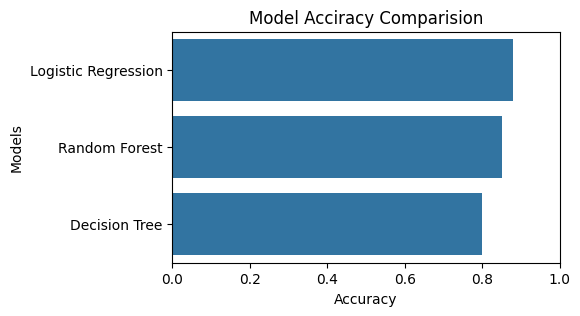

In [21]:
# Compare model
print("Model Comparision")
result_df = pd.DataFrame(list(result.items()), columns = ['model','accuracy'])
result_df = result_df.sort_values(by ='accuracy', ascending = False)

plt.figure(figsize = (5,3))
sns.barplot(x='accuracy',y='model',data=result_df)
plt.title('Model Acciracy Comparision')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.xlim(0,1)
plt.savefig('model_comparision.png')
plt.show()

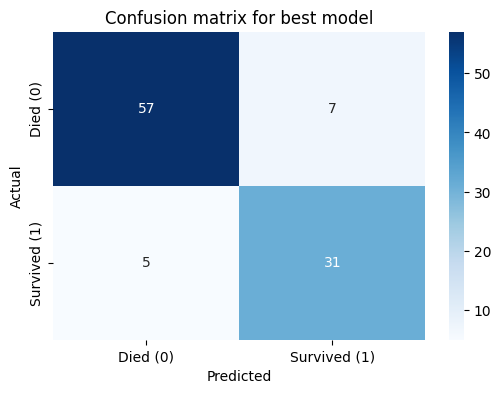

In [22]:
# Plot confusion matrix for best model
plt.figure(figsize = (6,4))
y_pred_ls = models['Logistic Regression'].predict(X_test)
cm_ls = confusion_matrix(y_test,y_pred_ls)
sns.heatmap(cm_ls,annot = True, fmt='d', cmap='Blues',
            xticklabels=['Died (0)','Survived (1)'],
            yticklabels=['Died (0)','Survived (1)'])
plt.title('Confusion matrix for best model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig(f'{name.replace(' ','_')}confusion_matrix.png')
plt.show()

## 6. Feature Importance Analysis

Understanding which features most influence survival predictions is vital for interpretation.  
After model training, feature importance scores are extracted (especially from ensemble models like Random Forest).

1. **Ranking Important Features:**  
   - Variables such as `Sex`, `Pclass`, and `Age` often appear as top predictors.

2. **Visualization:**  
   - Feature importance plots help visualize the contribution of each attribute to model performance.

3. **Interpretation:**  
   - These insights not only validate the model but also provide meaningful understanding of survival factors on the Titanic.

In [23]:
# Feature Importance Analysis
if 'model' in locals() and 'Random Forest' in models:
    importances = model.feature_importances_
    feauture_names = X_train.columns
    importance_df = pd.DataFrame({
        'Feature':feauture_names,
        'Importance':importances
    })
    
    importance_df = importance_df.sort_values(by = 'Importance', ascending = False)
    print(importance_df)
else:
    print("Error")

        Feature  Importance
0           Sex    0.316368
2          Fare    0.224011
1           Age    0.218529
6   Family_size    0.093538
5      Pclass_3    0.073198
7       Title_1    0.034937
3      Pclass_1    0.031621
13        Emb_3    0.003178
12        Emb_2    0.002326
11        Emb_1    0.001110
4      Pclass_2    0.000879
10      Title_4    0.000306
9       Title_3    0.000000
8       Title_2    0.000000


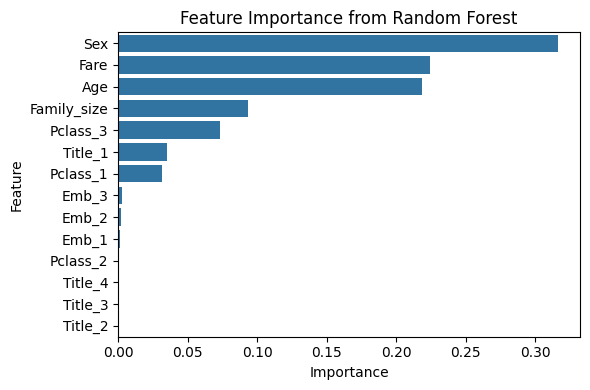

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(x='Importance',y='Feature',data = importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## 7. Model Saving and Deployment

To preserve the best model for future use, it is saved using the `joblib` library.  
This step allows efficient reuse of the trained model without retraining.

1. **Model Serialization:**  
   - The final trained model is exported to disk (`.pkl` or `.joblib` file).

2. **Practical Deployment:**  
   - The model can later be loaded to make real-time predictions on new passenger data.

Model saving ensures reproducibility and practical usability of the work beyond notebook experimentation.


In [25]:
import joblib 
model_file_name = 'titanic_logistic_regression_model.pkl'
joblib.dump(models['Logistic Regression'], model_file_name)
print("SAVED")

SAVED


## 8. Final Predictions and Submission

The optimized model is used to generate predictions on the test dataset.  
These predictions are formatted into a CSV file matching the Kaggle submission structure.

1. **Prediction Generation:**  
   - Model outputs are converted into survival labels (0 or 1).

2. **Submission File Creation:**  
   - The final CSV file includes `PassengerId` and predicted `Survived` columns.

3. **Validation:**  
   - A quick sanity check ensures data consistency and correct formatting.

This marks the final step of the machine learning workflow and prepares the project for evaluation.


## 9. Conclusion and Future Work

This project demonstrates an end-to-end machine learning pipeline using the Titanic dataset, from exploration and feature engineering to model evaluation and deployment.

**Key Takeaways:**
- Logistic Regression and Random Forest performed well on the dataset.  
- Feature engineering significantly boosted model accuracy.  
- Sex, Pclass, and Age emerged as the most influential survival predictors.

**Future Enhancements:**
- Apply advanced ensemble methods (e.g., XGBoost, Gradient Boosting).  
- Perform hyperparameter optimization using GridSearchCV.  
- Explore deep learning models for comparison.

The project provides a complete, interpretable example of predictive modeling and can serve as a strong foundation for future data science projects.
